<a href="https://colab.research.google.com/github/Dmarv/Resume/blob/Python/BigDataQueries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Homework 2: SQL
## Due: Monday, Oct 11, 2022 by 11:59pm ET 
### Worth 100 points in total

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment will focus on broadening both of these horizons by covering hierarchical data, graphs, and traversing relationships as well as a new tool to add to your data science arsenal: SQL.

Through this homework, we will familiarize ourselves with SQL (specifically **pandasql**) and explore a dataset that involves movie statistics and reviews courtesy of Rotten Tomatoes. We will finish off the homework with some text analysis.

We are introducing a lot of new things in this homework, and it is often where students start to get lost in the data science sauce, so we **strongly** encourage you to review the slides/material as you work through this assignment and will try to link the most relevant sections!

**Before you Begin**
- Be sure to click "Copy to Drive" to make sure you are working on your own personal version of the homework
- Read the Ed Discussion and FAQ for updates! If you have been stuck, chances are other students are too! We don't want you to waste away for two hours trying to get that last point on the autograder so do check Ed Discussion for similar struggles or even homework bugs that will be clarified in the FAQ :) 

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [ ]:
!pip3 install penngrader
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import re
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/rotten_tomatoes_movies.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/rotten_tomatoes_critic_reviews.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/MoviesOnStreamingPlatforms.csv

File ‘rotten_tomatoes_movies.csv’ already there; not retrieving.

File ‘rotten_tomatoes_critic_reviews.csv’ already there; not retrieving.

File ‘MoviesOnStreamingPlatforms.csv’ already there; not retrieving.



In [ ]:
print(pd.__version__)
# Make sure it's 1.1.5

1.1.5


### PennGrader Setup

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 56564387

In [ ]:
grader = PennGrader(homework_id = 'CIS_5450O_Fall22_HW2', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 56564387

Make sure this correct or we will not be able to store your grade




# Section 1: Welcome to the movies!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Rotten_Tomatoes_logo.svg/2880px-Rotten_Tomatoes_logo.svg.png" width= "500" align ="center"/></center>
<br>

I'm sure everyone has looked on the internet at some point in their lives for reviews, whether it be for products, locations, or services. Reviews are important because they give us knowledge about how good (or bad) the reviewed item was, at least in the past. Rotten Tomatoes contains one of the most comprehensive databases of movie/TV show reviews. Its name comes from how audience members in the past tended to throw rotten tomatoes when they disliked a stage performance. Formed in 1998 by a bunch of students, it has withstood the test of time, and the rest is history... that you can read about yourself on [Wikipedia](https://en.wikipedia.org/wiki/Rotten_Tomatoes). 


In this homework, we'll be exploring some data about movies including:

*   Movies: data about movies in the Rotten Tomatoes database.

*   Reviews: data about each review that was posted on Rotten Tomatoes.

*   Streamed movies: data about the movies that are currently available on major streaming platforms. 


We'll be parsing this data into dataframes and relations, and then exploring how to query and assemble the tables into results. We will primarily be using PandaSQL, but for some of the initial questions, we will ask you to perform the same operations in Pandas as well, so as to familiarize you with the differences and similarities of the two. `

## Part 1: Load & Process our Datasets [9 points total]

Before we get into the data, we first need to load and clean our datasets. 

**TODO**:
* Load and save the `rotten_tomatoes_movies.csv` to a dataframe called `movies_df`.
* Load and save the `rotten_tomatoes_critic_reviews.csv` to a dataframe called `reviews_df`.
* Load and save the `MoviesOnStreamingPlatforms.csv` to a dataframe called `streaming_df` without the index column being included.

In [ ]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
streaming_df  = pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [ ]:
# view movies_df to make sure the import was successful
movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,24,3


In [ ]:
# view reviews_df to make sure the import was successful
reviews_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
# view streaming_df to make sure the import was successful
streaming_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


### 1.1 Data Preprocessing

Next, we are going to want to clean up our dataframes, namely `movies_df` and `reviews_df`, by 1) fixing column names, 2) changing datatypes, 3) cleaning text, and 4) handling nulls.

First, let us view the first few rows of `movies_df`. You may also call `.info()` to view the specifics of the dataframe. This is a good first step to take for Exploratory Data Analysis (EDA).

In [ ]:
# view info information regarding movies_df
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

#### 1.1.1 Cleaning `movies_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls, based on which we can now clean our dataframe. 

**TODO**:
* Drop the columns `critics_consensus` and `production_company`.
* Replace all nulls in the column `genres` with the string `"No Genre"`.
* Drop all rows that have at least one null.
* Cast columns `original_release_date`,`streaming_release_date` to be type `datetime64[ns]`.
* Cast columns `runtime`,`tomatometer_count`, `tomatometer_rating`, `audience_count`, and `audience_rating` to be type `int64`.

In [ ]:
# TODO: clean movies_df

movies_df.drop(columns=['critics_consensus', 'production_company'], inplace=True)
movies_df["genres"].fillna('No Genre', inplace=True)
movies_df.dropna(inplace=True)
movies_df['original_release_date'] = pd.to_datetime(movies_df['original_release_date'])
movies_df['streaming_release_date'] = pd.to_datetime(movies_df['streaming_release_date'])
cast_list = ['runtime', 'tomatometer_count','tomatometer_rating','audience_count','audience_rating']
for col in cast_list:
  movies_df[col] = movies_df[col].astype('int')
movies_df



,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90,Certified-Fresh,87,142,Upright,64,11574,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122,Fresh,67,24,Spilled,53,14684,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95,Certified-Fresh,100,54,Upright,97,105386,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127,Fresh,89,27,Upright,74,68918,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17706,m/zoom_2006,Zoom,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2012-04-16,88,Rotten,4,68,Spilled,33,11369,3,65
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104,Rotten,56,9,Upright,74,1195,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108,Certified-Fresh,98,291,Upright,92,101511,285,7
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135,Fresh,96,23,Upright,91,30193,22,1


In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_movies', answer = movies_df.head(1000))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Processing Genres

`movies_df` also contains a `genres` column that represents an exhaustive list of all the genres a particular movie falls under. The comma-separated string format this column is in isn't too useful to us at the moment...

**TODO**:
- Copy over `movies_df` into a new dataframe called `exploded_movies_df`. 
- Split the genres listed such that each row contains only one listed genre (if a particular movie has 2 genres, that row will appear twice for each of the genres) - call this column `genre`
- Strip the `genre` column of any leading or trailing whitespaces


**Hint**: 
- See the `.explode()` and `.strip()` functions
- Do not overwrite or drop the `genres` column in both the `movies_df` and `exploded_movies_df`.

In [ ]:
from traitlets.traitlets import literal_eval
# TODO: create new dataframe and genre column
exploded_movies_df = movies_df.copy()
exploded_movies_df['genre'] = exploded_movies_df['genres'].str.split().str.join('').str.replace('&', ' & ').str.split(',')
exploded_movies_df = exploded_movies_df.explode('genre')
exploded_movies_df

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76,Action & Adventure
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76,Comedy
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76,Drama
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76,ScienceFiction & Fantasy
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90,Certified-Fresh,87,142,Upright,64,11574,123,19,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135,Fresh,96,23,Upright,91,30193,22,1,Classics
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135,Fresh,96,23,Upright,91,30193,22,1,Drama
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2016-03-22,121,Rotten,50,8,Upright,62,4469,4,4,Action & Adventure
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2016-03-22,121,Rotten,50,8,Upright,62,4469,4,4,ArtHouse & International


In [ ]:
# 3 points
grader.grade(test_case_id = 'test_genre_processing', answer = exploded_movies_df.head(1000))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `reviews_df`

Then, let's take a look at cleaning `reviews_df`.

In [ ]:
#view info of reviews_df
reviews_df.info

<bound method DataFrame.info of         rotten_tomatoes_link        critic_name  top_critic  \
0                  m/0814255    Andrew L. Urban       False   
1                  m/0814255      Louise Keller       False   
2                  m/0814255                NaN       False   
3                  m/0814255       Ben McEachen       False   
4                  m/0814255        Ethan Alter        True   
...                      ...                ...         ...   
1130012          m/zulu_dawn      Chuck O'Leary       False   
1130013          m/zulu_dawn          Ken Hanke       False   
1130014          m/zulu_dawn    Dennis Schwartz       False   
1130015          m/zulu_dawn  Christopher Lloyd       False   
1130016          m/zulu_dawn     Brent McKnight       False   

                          publisher_name review_type review_score review_date  \
0                         Urban Cinefile       Fresh          NaN  2010-02-06   
1                         Urban Cinefile       Fr


**TODO**:
* Drop all rows that have a null value in the column `review_score` or `review_content`.
* Replace each null in the `critic_name` column with the string `"Anonymous"`.
* Convert column `review_date` into type `datetime64[ns]`.


In [ ]:
#TODO: Clean reviews_df
reviews_df.dropna(subset=['review_score', 'review_content'], inplace=True)
reviews_df.fillna('Anonymous', inplace=True)
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_reviews', answer = reviews_df.head(1000))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just jump in, but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [ ]:
# Your EDA here! Feel free to add more cells
movies_df

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119,Rotten,49,149,Spilled,53,254421,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90,Certified-Fresh,87,142,Upright,64,11574,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122,Fresh,67,24,Spilled,53,14684,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95,Certified-Fresh,100,54,Upright,97,105386,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127,Fresh,89,27,Upright,74,68918,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17706,m/zoom_2006,Zoom,"Capt. Zoom, or Jack (Tim Allen), as he is now ...",PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2012-04-16,88,Rotten,4,68,Spilled,33,11369,3,65
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104,Rotten,56,9,Upright,74,1195,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108,Certified-Fresh,98,291,Upright,92,101511,285,7
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135,Fresh,96,23,Upright,91,30193,22,1


## Part 2: Exploring the Data with PandasSQL (and Pandas) [75 points total]

Now that you are familiar (or still unfamiliar) with the dataset, we will now introduce you to SQL, or more specifically **pandasql**: a package created to allow users to query pandas DataFrames with SQL statements.

The typical flow to use pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

Pandasql is convenient in that it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `movies_df`, `reviews_df` and `streaming_df` that you have created above!

Given that it is a brand new language, we wanted to give you a chance to directly compare the similarities/differences of the pandas that you already know and the SQL that you are about to learn. Thus, for each of the simpler queries, we ask that you **look into the question twice: once with pandas and once with pandasql**. 

Each answer will thus require both a `pd_` and `sql_` prefixed-dataframe that you will submit seperately to the autograder. **We will be reviewing your code to make sure you wrote the code in the corresponding languages.**


###2.1 Movie Recommendations

#### 2.1.1 What movies have good reviews from critics and audience?

`movies_df` contains all sorts of movies. We all love good movies, so let's try to separate the good from the bad.

Rotten Tomatoes offers two major aggregate ratings: 
- one by critics, in the column `tomatometer_status`, and has three possible values: `Certified-Fresh`,`Fresh`, and `Rotten`.
- the other by audience members, in the column `audience_status`, and has two possible values: `Upright` (good) and `Spilled` (bad).

**TODO:** Using **pandas**, filter out movies from `movies_df` that are `Certified-Fresh` or `Fresh` into a new dataframe named `good_critics_df`, which should have the following schema:

>rotten_tomatoes_link | movie_title
>--- | ---



In [ ]:
# TODO: Use pandas to obtain good_critics_df
good_critics_df = movies_df.copy()
good_critics_df = good_critics_df[(good_critics_df['tomatometer_status'] == 'Certified-Fresh') | (good_critics_df['tomatometer_status'] == 'Fresh')]
good_critics_df = good_critics_df[['rotten_tomatoes_link','movie_title']]
good_critics_df

,rotten_tomatoes_link,movie_title
1,m/0878835,Please Give
2,m/10,10
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men)
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea"
6,m/1000121-39_steps,The 39 Steps
...,...,...
17701,m/zombies_of_mass_destruction,ZMD: Zombies of Mass Destruction
17702,m/zoo_2018,Zoo
17704,m/zoolander,Zoolander
17708,m/zootopia,Zootopia


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_good_critics_df', answer = good_critics_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


then, let's consider the ratings by movie-goers.

**TODO:** Using **pandasql**, filter out movies from `movies_df` that are rated as `Upright` by the audience, into a new dataframe named `good_audience_df`, which should have the following schema:

>rotten_tomatoes_link | movie_title
>--- | ---

In [ ]:
# TODO: Use pandasql to obtain good_audience_df
good_audience_query = """
SELECT rotten_tomatoes_link, movie_title
FROM movies_df
WHERE audience_status="Upright";
"""

good_audience_df = ps.sqldf(good_audience_query, locals())
good_audience_df

,rotten_tomatoes_link,movie_title
0,m/0878835,Please Give
1,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men)
2,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea"
3,m/1000121-39_steps,The 39 Steps
4,m/1000123-310_to_yuma,3:10 to Yuma
...,...,...
7764,m/zoolander,Zoolander
7765,m/zoot_suit,Zoot Suit
7766,m/zootopia,Zootopia
7767,m/zulu,Zulu


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_good_audience_df', answer = good_audience_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we can simply join these dataframes to get a table of all the best movies and binge watch one every night! But wait! Sometimes, the opinions of critics and audience may differ, so we need to make sure that the good movies we watch are ones that are viewed positively by both critics and audiences. 

**TODO**: Using **pandas and pandasql**, filter out movies with **mixed reviews** (ie. audience and critic opinions differ) to a new dataframe `pd/sql_mixed_movies_df`, ordered by lexicographic order of `movie_title`.

For this question, you should **NOT** use `movies_df` or `exploded_movies_df`.

Some tips:
* For pandas, explore the `indicator` parameter within the `merge()` function.
* For pandasql, considering using `EXCEPT`.

In [ ]:
# TODO: Filter out movies with mixed reviews using pandas
good_audience_df_copy = good_audience_df.copy()
good_audience_df_copy = good_audience_df_copy[['movie_title', 'rotten_tomatoes_link']]
pd_mixed_movies_df = good_critics_df.merge(good_audience_df, how='outer', on=['rotten_tomatoes_link'], indicator=True)
pd_mixed_movies_df = pd_mixed_movies_df[~(pd_mixed_movies_df['_merge'] =='both')]
pd_mixed_movies_df['movie_title_x'].fillna('', inplace=True)
pd_mixed_movies_df['movie_title_y'].fillna('', inplace=True)
pd_mixed_movies_df['movie_title'] = pd_mixed_movies_df['movie_title_x'] + pd_mixed_movies_df['movie_title_y']
pd_mixed_movies_df = pd_mixed_movies_df[['rotten_tomatoes_link', 'movie_title']].sort_values(by=['movie_title'])
pd_mixed_movies_df

,rotten_tomatoes_link,movie_title
2584,m/dollars,$ (Dollars) (The Heist)
998,m/999_2008,$9.99
5460,m/r-xmas,'R Xmas
8123,m/1_night,1 Night (One Night)
1,m/10,10
...,...,...
9625,m/zulu_dawn,Zulu Dawn
5521,m/rec_4_apocalypse,[REC] 4: Apocalypse
1963,m/bwoy,bwoy
3678,m/iboy,iBoy


In [ ]:
# 4 points
grader.grade(test_case_id = 'test_pd_mixed_movies', answer = pd_mixed_movies_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# TODO: Filter out movies with mixed reviews from good_critics_df and good_audience_df
mixed_query = """
SELECT c.rotten_tomatoes_link, c.movie_title
FROM good_critics_df AS c
LEFT JOIN good_audience_df as a ON a.rotten_tomatoes_link = c.rotten_tomatoes_link
UNION
SELECT c.rotten_tomatoes_link, c.movie_title
FROM good_audience_df AS c
LEFT JOIN good_critics_df as a ON a.rotten_tomatoes_link = c.rotten_tomatoes_link
EXCEPT
SELECT d.rotten_tomatoes_link, d.movie_title
FROM good_critics_df AS d
INNER JOIN good_audience_df as b ON b.rotten_tomatoes_link = d.rotten_tomatoes_link
ORDER BY c.movie_title
"""


sql_mixed_movies_df = ps.sqldf(mixed_query,locals())
sql_mixed_movies_df

,rotten_tomatoes_link,movie_title
0,m/dollars,$ (Dollars) (The Heist)
1,m/999_2008,$9.99
2,m/r-xmas,'R Xmas
3,m/1_night,1 Night (One Night)
4,m/10,10
...,...,...
3545,m/zulu_dawn,Zulu Dawn
3546,m/rec_4_apocalypse,[REC] 4: Apocalypse
3547,m/bwoy,bwoy
3548,m/iboy,iBoy


In [ ]:
# 4 points
grader.grade(test_case_id = 'test_sql_mixed_movies', answer = (mixed_query,sql_mixed_movies_df))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**

Using **pandas/pandasql**, `pd/sql_mixed_movies_df` and `movies_df`, find the top 10 mixed movies with the **largest absolute difference** in critic review score and audience review score. You should calculate this as the absolute difference between `tomatometer_rating` and `audience_rating`, and store this in a column named `diff`. If multiple movies have the same `diff` value, order their rows in lexicographic order.

Format the output as a dataframe called `pd/sql_top_10_mixed_movies_df` that has the following schema:

>movie_title | diff
>--- | ---


In [ ]:
# TODO: pandas
pd_top_10_mixed_movies_df = movies_df.copy()
pd_top_10_mixed_movies_df = pd_top_10_mixed_movies_df[['tomatometer_rating', 'audience_rating', 'movie_title']]
pd_top_10_mixed_movies_df['diff'] = abs(pd_top_10_mixed_movies_df['tomatometer_rating'] - pd_top_10_mixed_movies_df['audience_rating'])
pd_top_10_mixed_movies_df = pd_top_10_mixed_movies_df[['movie_title', 'diff']]
pd_top_10_mixed_movies_df.sort_values(by=['diff', 'movie_title'], ascending=[False,True], inplace=True)
pd_top_10_mixed_movies_df = pd_top_10_mixed_movies_df.iloc[0:10]

In [ ]:
#TODO: pandasql
top_10_mixed_query = """
SELECT movie_title, abs(tomatometer_rating - audience_rating) as diff
FROM movies_df
ORDER BY diff DESC, movie_title ASC
LIMIT 10;
"""

sql_top_10_mixed_movies_df = ps.sqldf(top_10_mixed_query,locals())
sql_top_10_mixed_movies_df

,movie_title,diff
0,96 Souls,95
1,Hating Breitbart,92
2,Is That a Gun in Your Pocket?,92
3,The After Party,87
4,Outside the Law,86
5,Fall,84
6,Vengeance Valley,82
7,The Music of Silence,81
8,All Relative,80
9,Sparkle,80


In [ ]:
# 6 points
grader.grade(test_case_id = 'test_top_10_mixed', answer = (top_10_mixed_query,pd_top_10_mixed_movies_df,sql_top_10_mixed_movies_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 What movies can we recommend to Professor Davidson?

Professor Davidson wants to take a break from teaching CIS 545. She is considering watching a movie on her Netflix account, and is gathering movie recommendations from you.

Because her favourite holiday is halloween, Professor Davidson is looking to watch a horror movie. But first, she wants to answer a long-standing question in her mind: are there more horror movies during October? 

**TODO**: 
- add a column `month` to movies_df that contains the month of the movie's original date of release.
- Using **pandas and pandasql**, find the number of movies classified as `Horror`, grouped by month. Store this number in a column `num_movies` in descending order, and store the results in `pd/sql_horror_df` which should have the following format:

>month | num_movies
>--- | ---

HINT: Recall that the `genres` column in `movies_df` is not exploded and thus contains a string of (possibly multiple) genres. Therefore, to get the movies that are classified as `Horror`, we will need to check for string similarity.
- for Pandas, you can use str.contains()
- for Pandasql, you may take a look at `LIKE()` and the wildcards `_` and/or `%`.



In [ ]:
# TODO: pandas version
movies_df['month'] = pd.DatetimeIndex(movies_df['original_release_date']).month
pd_horror_df = movies_df[movies_df['genres'].str.contains('Horror')]
pd_horror_df = pd_horror_df.groupby(by=['month'])['month'].count().reset_index(name='num_movies')
pd_horror_df.sort_values(by=['num_movies'], ascending=False, inplace=True)
pd_horror_df

,month,num_movies
0,1,230
9,10,209
8,9,160
7,8,152
3,4,143
5,6,143
2,3,133
1,2,113
6,7,107
4,5,105


In [ ]:
# TODO: pandasql version
horror_query = """
SELECT month, COUNT(month) as num_movies
FROM movies_df
WHERE genres LIKE '%Horror%'
GROUP BY month
ORDER BY num_movies DESC;
"""

sql_horror_df = ps.sqldf(horror_query,locals())
sql_horror_df

,month,num_movies
0,1,230
1,10,209
2,9,160
3,8,152
4,4,143
5,6,143
6,3,133
7,2,113
8,7,107
9,5,105


In [ ]:
# 4 points
grader.grade(test_case_id = 'test_horror_month', answer = (horror_query, pd_horror_df, sql_horror_df))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


It seems like October is not the most popular month in which horror movies are released. 

**TODO:**
Using **pandas and pandasql**, find the movies classified as `Horror` that were originally released in **January**. Store the results in `pd/sql_jan_df` which should have the following format, sorted in descending order of `audience_count`:

>rotten_tomatoes_link | movie_title | audience_count
>--- | --- | ---

In [ ]:
# TODO: pandas version
pd_jan_df = movies_df.copy()
pd_jan_df = pd_jan_df[(pd_jan_df['month'] == 1) & (pd_jan_df['genres'].str.contains('Horror'))]
pd_jan_df = pd_jan_df[['rotten_tomatoes_link', 'movie_title', 'audience_count']]
pd_jan_df.sort_values(by=['audience_count'], ascending=False, inplace=True)
pd_jan_df


,rotten_tomatoes_link,movie_title,audience_count
196,m/10010150-unborn,The Unborn,831848
16730,m/uninvited_2009,The Uninvited,659265
7890,m/hostel,Hostel,471115
6432,m/final_destination_2,Final Destination 2,449641
7783,m/hitcher,The Hitcher,422249
...,...,...,...
8382,m/inside_2018,Inside,99
3553,m/big_muddy_2011,Big Muddy,75
5375,m/delirium_2018,Delirium,72
15157,m/the_host_2020,The Host,51


In [ ]:
# TODO: pandasql version
jan_query = """
SELECT rotten_tomatoes_link, movie_title, audience_count
FROM movies_df
WHERE genres LIKE '%Horror%' AND month=1
ORDER BY audience_count DESC
"""

sql_jan_df = ps.sqldf(jan_query, locals())
sql_jan_df

,rotten_tomatoes_link,movie_title,audience_count
0,m/10010150-unborn,The Unborn,831848
1,m/uninvited_2009,The Uninvited,659265
2,m/hostel,Hostel,471115
3,m/final_destination_2,Final Destination 2,449641
4,m/hitcher,The Hitcher,422249
...,...,...,...
225,m/inside_2018,Inside,99
226,m/big_muddy_2011,Big Muddy,75
227,m/delirium_2018,Delirium,72
228,m/the_host_2020,The Host,51


In [ ]:
# 4 points
grader.grade(test_case_id = 'test_horror_jan', answer = (jan_query, pd_jan_df, sql_jan_df))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


With all the information about these movies, we are ready to help Professor Davidson find her dream movie. In particular, she wants a movie that: 
- is a horror movie
- was originally released in January 
- has been watched by at least 50000 audience members, with an overall `audience_rating` of `Upright`.  

**TODO**:
* Using the information provided above, and using **pandasql**, find the top 10 movies that fit her criteria, sorted by descending order of `audience_count`. Store this in a dataframe called `movie_recs_df`, that has the following schema:

>rotten_tomatoes_link | movie_title | audience_count
>--- | --- | ---

**Hint**: you may find it helpful to leverage `good_audience_df` and `pd_jan_df`.

In [ ]:
# TODO: use pandasql to find top 10 movies that fit criteria
recs_query = """
SELECT rotten_tomatoes_link, movie_title, audience_count
FROM movies_df
WHERE genres LIKE '%Horror%' AND month=1 AND audience_count >= 50000 AND audience_status = 'Upright'
ORDER BY audience_count DESC
LIMIT 10;
"""

movie_recs_df = ps.sqldf(recs_query, locals())
movie_recs_df


,rotten_tomatoes_link,movie_title,audience_count
0,m/phantom_of_the_opera,The Phantom of the Opera,412132
1,m/from_dusk_till_dawn,From Dusk Till Dawn,273797
2,m/tremors,Tremors,240153
3,m/underworld_rise_of_the_lycans,Underworld: The Rise of the Lycans,232651
4,m/evil_dead_2_dead_by_dawn,Evil Dead 2: Dead by Dawn,148402
5,m/underworld_awakening,Underworld: Awakening,98541
6,m/1011615-king_kong,King Kong,90136
7,m/not_easily_broken,Not Easily Broken,69412
8,m/let_the_right_one_in,Let the Right One In,61368
9,m/eraserhead,Eraserhead,57526


In [ ]:
# 6 points
grader.grade(test_case_id = 'test_recs', answer = (recs_query, movie_recs_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2 Good Critic Reviews 

Now let us switch gears and examine `reviews_df`. In particular, we want to find the critics who are good at writing reviews.

The first criteria that defines a good reviewer is balance and objectivity. Just like people (other than me), no movie is perfect, and so we probably want reviews to cover both the good and the bad. 

**TODO**: Using `reviews_df` and **pandasql**, find the reviews that contain both the word `"good"` and the word `"bad"` (case-insensitive). Include substrings (ie. it can be part of a word, such as '**good**-natured' or 'for**bad**e').

Store the results in `balanced_df`, ordered by lexicographical order of `review_content`, with the following schema:

>critic_name | review_content | 
>--- | --- | 

HINT: This involves checking for string similarity.
- for Pandas, you can use str.contains()
- for Pandasql, you may take a look at `LIKE()` and the wildcards `_` and/or `%`.



In [ ]:
# TODO: use pandasql to find reviews with both words "good" and "bad"

balanced_query = """
SELECT critic_name, review_content
FROM reviews_df
WHERE LOWER(review_content) LIKE '%good%' AND LOWER(review_content) LIKE '%bad%'
ORDER BY review_content ASC;

"""
balanced_df = ps.sqldf(balanced_query, locals())
# reviews_df
balanced_df

,critic_name,review_content
0,Mick LaSalle,"""A United Kingdom"" features committed performa..."
1,Chris Hewitt,"""Act of Valor"" looks a good deal like a war-th..."
2,Adam Graham,"""Alexander"" won't change your day, but it's no..."
3,Robin Clifford,"""Bad"" is the operative word for ""Bad Company,""..."
4,Brent McKnight,"""Brick Mansions"" isn't a good movie, but it is..."
...,...,...
2308,Ross Anthony,salvageable bad boy falling for the relentless...
2309,Joel Meares,simply isn't bad enough to be any good
2310,Jason McKiernan,struggles to reconcile the precious good with ...
2311,Andrea Chase,"taut, intelligent thriller that delves into th..."


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_balanced_df', answer = (balanced_df, balanced_query))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


*Good cause, bad movie.* One of my favourite quotes.

The second criteria we have for good critics is tenure. Let us find the "seasoned" reviewers, ie. those who have been writing reviews for a long period of time.

**TODO**: Using `reviews_df` and **pandasql**:
- Create a column `date_diff` which contains the difference (in number of days) between each critic's first review and most recent review
- Only include reviews from the 21st Century (ie. published from 2000 onward)
- Only include critics whose first and most recent reviews are at least 10 years **(3652 days)** apart
- Do not include reviews by `'Anonymous'`
- Make sure your `date_diff` column contains integer values (HINT: see `CAST()`).

You may consider casting the dates into a [format](https://www.sqlite.org/lang_datefunc.html) that will help produce the difference in days. 

Store the results in `critics_time_df`, ordered by descending order of `date_diff`, with the following schema:

>critic_name | date_diff | 
>--- | --- | 

HINT: 
- You may either include only reviews that are in the 21st Century, or include critics whose first review is in the 21st Century.
- For datetime manipulation, you may take a look at `JULIANDAY()` or `strftime()`. But be consistent with your approach throughout your query. In other words, do not mix and match `JULIANDAY()` and `strftime()` within the same query as you will not get consistent results.

In [ ]:
# TODO: use pandasql to find seasoned reviewers



time_query = """
SELECT min_jul_day.critic_name, CAST((latest-earliest) AS int) AS date_diff
FROM 
    (SELECT critic_name, MIN(jul_day) as earliest
    FROM 
        (SELECT critic_name, CAST(JULIANDAY(review_date) AS float) AS jul_day
        FROM reviews_df 
        WHERE JULIANDAY(review_date) >= JULIANDAY('2000-01-01') AND NOT critic_name = 'Anonymous'
        ORDER BY critic_name ASC, review_date ASC) AS jul_and_filtered
    GROUP BY critic_name) AS min_jul_day
    JOIN
    (SELECT critic_name, MAX(jul_day) as latest
    FROM 
        (SELECT critic_name, CAST(JULIANDAY(review_date) AS float) AS jul_day
        FROM reviews_df 
        WHERE JULIANDAY(review_date) >= JULIANDAY('2000-01-01') AND NOT critic_name = 'Anonymous'
        ORDER BY critic_name ASC, review_date ASC) AS jul_and_filtered
    GROUP BY critic_name) AS max_jul_day
    ON min_jul_day.critic_name = max_jul_day.critic_name
WHERE date_diff > 3652
ORDER BY date_diff DESC

"""

critics_time_df = ps.sqldf(time_query, locals())
critics_time_df


,critic_name,date_diff
0,Frederic and Mary Ann Brussat,7604
1,Jo Berry,7604
2,Empire Staff,7601
3,Randall King,7601
4,David Nusair,7599
...,...,...
845,Margot Harrison,3666
846,Norman Wilner,3661
847,Jon Bream,3654
848,Ricardo Baca,3654


In [ ]:
# 6 points
grader.grade(test_case_id = 'test_critic_review_time', answer = (critics_time_df, time_query))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 What do we watch on Netflix tonight?

Now let's run a tougher analysis. I'm sure we've all experienced the aimless scrolling through the Netflix homepage, trying (and sometimes failing) to find a movie that interests us. It's painful to manually search up the reviews of each movie we see, so why don't we try to automate this process? Let's determine the best on Netflix for each genre using both critics' and audiences' opinions on Rotten Tomatoes.

This (and the next 2 questions) will require you to write a [nested SQL query](https://learnsql.com/blog/sql-nested-select/). That is, there will be at least one SELECT statement inside of another SELECT statement. This means that you should **NOT** write two separate SQL commands and call ps.sqldf() twice. 

**TODO**: Using `exploded_movies_df` and `streaming_df`:
- Find all movies on Netflix, then **for each genre,** identify the ones with the highest combined RT tomatometer and audience rating (include all ties). Call this new column `combined_rt_rating`.
- Rename the key `genre_category`, and sort your final result by this column in ascending order.

Though it could be helpful, **you do NOT have to implement this in pandas**. Store the results in `netflix_best_df`, which should have the following format:

>movie_title | genres | genre_category | combined_rt_rating
>--- | --- | --- | ---

where `genres` represents all the genres of the movie, and `genre_category` represents the genre that the movie's RT ratings are compared to.

HINT: Consider the case when there may be ties between multiple movies that have the same highest combined_rt_rating for a particular genre.

In [ ]:
# TODO: use pandasql to find the best on Netflix

exploded_movies_reset= exploded_movies_df.copy()


netflix_best_query = """
SELECT e.movie_title, e.genres, m.genre_category, m.combined_rt_rating
FROM 
    (SELECT movie_title, genres, genre AS genre_category, MAX(tomatometer_rating + audience_rating) AS combined_rt_rating
    FROM exploded_movies_df JOIN streaming_df ON movie_title = Title
    WHERE Netflix = 1
    GROUP BY genre_category) AS m 
    JOIN 
    (SELECT movie_title, genres, genre, (tomatometer_rating + audience_rating) AS combined_rt
    FROM exploded_movies_df JOIN streaming_df ON movie_title = Title
    WHERE Netflix = 1) AS e
    ON e.combined_rt = m.combined_rt_rating AND e.genre = m.genre_category


ORDER BY m.genre_category
"""

netflix_best_df = ps.sqldf(netflix_best_query, locals())
# temp_df = ps.sqldf(temp_query, locals())

netflix_best_df
# exploded_movies_df 
# streaming_df
# temp_df
# exploded_movies_reset


,movie_title,genres,genre_category,combined_rt_rating
0,Hunt for the Wilderpeople,"Action & Adventure, Comedy",Action & Adventure,187
1,Terminator 2: Judgment Day,"Action & Adventure, Drama, Science Fiction & F...",Action & Adventure,187
2,Klaus,"Animation, Comedy, Kids & Family, Science Fict...",Animation,191
3,Mirai,"Animation, Anime & Manga, Art House & Internat...",Anime & Manga,170
4,Maktub,"Art House & International, Comedy, Drama",ArtHouse & International,199
5,Chinatown,"Classics, Drama, Mystery & Suspense",Classics,192
6,Maktub,"Art House & International, Comedy, Drama",Comedy,199
7,Mad Max,"Action & Adventure, Cult Movies, Science Ficti...",CultMovies,160
8,The C Word,Documentary,Documentary,194
9,Maktub,"Art House & International, Comedy, Drama",Drama,199


In [ ]:
# 10 points
grader.grade(test_case_id = 'test_netflix_best', answer = (netflix_best_query, netflix_best_df))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Which months of the year does each streaming service have the most number of movies available?

Maybe you don't care about picking out the "good" movies from the "bad" ones. Maybe you just want to watch as many movies as possible each month. Still, paying those monthly bills for all these streaming services (which seem to be increasing in number every day) doesn't seem to be a sustainable strategy. It would be much easier to pay for certain streaming services in the month they have the most movies.

**TODO**: Using `movies_df` and `streaming_df`,
- Count the number of movies for each streaming service per month using the `month` column in `movies_df` you created earlier.
- For each streaming service, find the month in which they have the most movies available and how many movies are available in that month. Include ties, if there are any.

Store the results in `best_streaming_df`, which should have the following format:

>streaming_service | max_month | num_movies
>--- | --- | --- |

For example, if Netflix has the most movies (100) in October and Hulu has the most movies (90) in January, your query should output:

streaming_service  | max_month        | num_movies
-------------------|------------------|--------------
Netflix    | 10                       | 100
Hulu       | 1                        | 90

and so on, for all four streaming services.

**Hints:**
- Make use of `UNION ALL` to stack tables with the same column names.

In [ ]:
# TODO: use pandasql to find the month where each streaming service has the most movies

netflix_df = pd.DataFrame({'streaming_service' : ['Netflix']})
hulu_df = pd.DataFrame({'streaming_service' : ['Hulu']})
prime_df = pd.DataFrame({'streaming_service' : ['Prime Video']})
disney_df = pd.DataFrame({'streaming_service' : ['Disney+']})


best_streaming_query = """
SELECT streaming_service, max_month, num_movies
FROM(
    SELECT *
    FROM (SELECT month AS max_month, max(Netflix) AS num_movies
        FROM (
            SELECT month, COUNT(movie_title) AS Netflix
            FROM (
                SELECT movie_title, month
                FROM movies_df AS m JOIN streaming_df AS s ON movie_title = Title
                WHERE Netflix = 1
                ORDER BY month) net
            GROUP BY month)) a JOIN netflix_df 

    UNION ALL

    SELECT *
    FROM (SELECT month AS max_month, max(Hulu) AS num_movies
        FROM (
            SELECT month, COUNT(movie_title) AS Hulu
            FROM (
                SELECT movie_title, month
                FROM movies_df AS m JOIN streaming_df AS s ON movie_title = Title
                WHERE Hulu = 1
                ORDER BY month) hul
            GROUP BY month)) b JOIN hulu_df

    UNION ALL

    SELECT *
    FROM (SELECT month AS max_month, max("Prime Video") AS num_movies
        FROM (
            SELECT month, COUNT(movie_title) AS "Prime Video"
            FROM (
                SELECT movie_title, month
                FROM movies_df AS m JOIN streaming_df AS s ON movie_title = Title
                WHERE "Prime Video" = 1
                ORDER BY month) pri
            GROUP BY month)) c JOIN prime_df

    UNION ALL
    SELECT *
    FROM (SELECT month AS max_month, max("Disney+") AS num_movies
        FROM (
            SELECT month, COUNT(movie_title) AS "Disney+"
            FROM (
                SELECT movie_title, month
                FROM movies_df AS m JOIN streaming_df AS s ON movie_title = Title
                WHERE "Disney+" = 1
                ORDER BY month) pri
            GROUP BY month))d  JOIN disney_df
            ) nameless_data

"""


best_streaming_df = ps.sqldf(best_streaming_query, locals())
best_streaming_df
# names_stream_df
# streaming_df
# movies_df

,streaming_service,max_month,num_movies
0,Netflix,10,92
1,Hulu,8,65
2,Prime Video,9,126
3,Disney+,6,44


In [ ]:
# 10 points
grader.grade(test_case_id = 'test_best_streaming', answer = (best_streaming_query, best_streaming_df))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.5 What movies are underrated by critics (ft. top critics)?

[According to the Rotten Tomatoes website](https://www.rottentomatoes.com/critics/top_critics), "Top Critic is a designation created to distinguish Tomatometer-approved critics who excel at their craft. Critics selected are well-established, influential, and prolific..." Although all critics on RT are officially approved, we want to establish a top-critic-only score that only includes the opinions of the "cream of the crop". Certain films could be poorly received by regular critics, but top critics see something special in them. Let's try and find these underappreciated movies!

**TODO**: Using `reviews_df` and `movies_df`:
- Filter out all non-top critics, then compute a new Tomatometer rating for each movie based on its proportion of Fresh reviews to total reviews (*both statistics among top critics only*). Call this new column `top_critic_tomatometer`, and **round this percentage to the nearest integer.**
- Constrain the movie pool to **only ones that have more than 5 top critic reviews** to mitigate outlier impact.
- Retrieve the top 10 movies with the highest difference between `top_critic_tomatometer` and its provided Tomatometer rating (`tomatometer_rating`) - name this difference `score_diff`. 
  - `top_critic_tomatometer` - `tomatometer_rating`. Not the absolute value of the difference.

Store the results in `underrated_movies_df`, which should have the following format:

>movie_title | top_critic_tomatometer | tomatometer_rating | score_diff
>--- | --- | --- | ---

**Hints:**
- SQLite stores booleans as integers 1 (True) and 0 (False), respectively.
- Tomatometer ratings are provided as percentages (i.e. 84 not 0.84), so make sure your top critic scores are as well.
- Since there are numerous remakes included in the dataset with the same name as the original/multiple other versions, make sure you conduct aggregate/join operations on `rotten_tomatoes_link` to ensure uniqueness.
- Dividing two integers in SQL yields a rounded integer. Try casting values to float instead of decimal to avoid rounding issue.

In [ ]:
# TODO: use pandasql to find the regular critics' underrated movies
underrated_movies_query = """
SELECT movie_title, top_critic_tomatometer, tomatometer_rating, (top_critic_tomatometer - tomatometer_rating) AS score_diff
FROM
    (SELECT f.movie_title, CAST(((CAST(fresh_count AS float)/ CAST(total_count AS float)) * 100) AS int) AS top_critic_tomatometer, f.tomatometer_rating
    FROM
        (SELECT m.movie_title, m.rotten_tomatoes_link, m.tomatometer_rating, COUNT(m.tomatometer_rating) AS fresh_count
        FROM movies_df AS m JOIN reviews_df AS r ON m.rotten_tomatoes_link = r.rotten_tomatoes_link
        WHERE top_critic = 1 AND review_type = "Fresh"
        GROUP BY m.rotten_tomatoes_link) AS f JOIN

        (SELECT m.movie_title, m.rotten_tomatoes_link, m.tomatometer_rating, COUNT(m.tomatometer_rating) AS total_count
        FROM movies_df AS m JOIN reviews_df AS r ON m.rotten_tomatoes_link = r.rotten_tomatoes_link
        WHERE top_critic = 1
        GROUP BY m.rotten_tomatoes_link) AS t ON f.rotten_tomatoes_link = t.rotten_tomatoes_link
    WHERE total_count > 5) AS fin

ORDER BY score_diff DESC
LIMIT 10;

"""
# reviews_df
# movies_df
# underrated_movies_df

**Note:** This query should take no more than a minute to run. If yours has been running for longer than a few minutes, then you're probably on the wrong track.

In [ ]:
underrated_movies_df = ps.sqldf(underrated_movies_query, locals())
underrated_movies_df

,movie_title,top_critic_tomatometer,tomatometer_rating,score_diff
0,An Everlasting Piece,100,48,52
1,Sgt. Bilko,80,31,49
2,Cry_Wolf,66,24,42
3,Richie Rich,66,24,42
4,Supernova,50,10,40
5,Barney's Great Adventure,71,32,39
6,15 Minutes,69,32,37
7,Far From the Madding Crowd,100,64,36
8,Reality (Réalité),100,64,36
9,Down and Derby,57,22,35


In [ ]:
# 15 points
grader.grade(test_case_id = 'test_underrated_movies', answer = (underrated_movies_query, underrated_movies_df))

Correct! You earned 15/15 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Working with Text Data [16 points]

Shifting gears, let's now try to do some text-based analysis. Text data is complex, but can also be used to generate extremely interpretable results, making it valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**How do reviews by top critics differ from reviews made by non-top critics?**


###3.1 Extract Data
**TODO**: Using `reviews_df`, create two dataframes:
* `top_critics_df`: where `top_critic` is True
* `regular_critics_df`: where `top_critic` is False.

Then, for each dataframe, convert the `review_content` column into two lists called `top_content` and `regular_content`, respectively.

In [ ]:
# TODO: create two dataframes & two lists

top_critics_df = reviews_df.copy()
top_critics_df = top_critics_df[top_critics_df['top_critic'] == 1]
top_content = top_critics_df['review_content'].tolist()

regular_critics_df = reviews_df.copy()
regular_critics_df = regular_critics_df[regular_critics_df['top_critic'] == 0]
regular_content = regular_critics_df['review_content'].tolist()

In [ ]:
# 1 point
grader.grade(test_case_id = 'test_top_content_df', answer = len(top_content))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# 1 point
grader.grade(test_case_id = 'test_regular_content_df', answer = len(regular_content))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###3.2 Tokenize the Text

Here, we are going to split up the content into a list of words. We will use the **nltk** package, which contains an extensive set of tools to process text. Of course, like regex, this homework would be miles long if we really went into detail, so we are only going to utilize the following components:
- `nltk.word_tokenize()`: a function used to tokenize our text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a","an","in" that are often ignored in text-related analysis

Note that prior to this step for text analysis, we would typically clean the text first using regex. We didn't have to do that because the dataset was already well-cleaned, bt keep that in mind.

**TODO:** First, use **stopwords** to create a set of the most common english stopwords. Then, implement **tokenized_content(content)** that takes in a content string and:
1. tokenizes the text
2. lowercases the token
3. removes stop words (commonly used words such as "a","an", "in")
4. keeps words with only alphabet characters (no punctuation)

In [ ]:
import nltk
import string
import wordcloud
nltk.__version__

'3.7'

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
# Note that stopwords are all in lowercase format

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# TODO: Create tokenized_content(content) function
a = "hello how are Doing don't well-meaning."
def tokenized_content(content):
  li = []
  punk = string.punctuation
  
  for word in nltk.word_tokenize(content):
    gate = 0
    lo = word.lower()
    if lo not in stopwords:
      for letter in lo:
        if not (letter.isalpha()):
          gate = 1
          break
      if gate == 0:
        li.append(lo)
  return li

# print(tokenized_content(a))


Now, apply your `tokenize_content()` function to each piece of content in **top_content** and **regular_content** and flatten both of the lists to create **top_tokens** and **regular_tokens**


In [ ]:
# TODO: tokenize and flatten
top_tokens = []
for line in top_content:
  for word in tokenized_content(line):
    top_tokens.append(word)

regular_tokens = []
for line in regular_content:
  for word in tokenized_content(line):
    regular_tokens.append(word)



In [ ]:
# 1 point
grader.grade(test_case_id = 'test_top_tokens', answer = len(top_tokens))


Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# 1 point
grader.grade(test_case_id = 'test_regular_tokens', answer = len(regular_tokens))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.3 Most Frequent Words
**TODO**: Now, find the 20 most common words amongst the content of `top_tokens` and `regular_tokens`. Return this as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: You can use `Counter` in this question: https://docs.python.org/2/library/collections.html#counter-objects

In [ ]:
# TODO: Find 20 most common words amongst the content of the top and regular critic reviews
import collections

top_most_common = Counter(top_tokens).most_common(20)
regular_most_common = Counter(regular_tokens).most_common(20)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_regular_most_common', answer = regular_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###3.4 Refining our Lists

Hmmm...both of these lists seem to display similar words. Let's try to tease out words that distinguish the high from the low scoring questions. 

One approach would be to find words in one list that are not in the other. This, however, may be too naive, as even if a word is extremely common in our high list, if it appears only once in our low list, it would get removed from consideration.

Let's instead find the difference between the counts within our two lists. Thus, if a word is really common in one, but not the other, the count would only decrease slightly. Alternatively, if a word is common in both lists, it would effectively zero out. 

However, given that the number of regular tokens is about three times that of top tokens, we need to make sure both lists are of equal length before applying the difference method. 

**TODO:** Randomly sample 1 million (1000000) tokens from `top_tokens` and `regular_tokens`, and place them in lists `top_sample` and `regular_sample` respectively.
-Then, using the difference method, create **distinct_top_counter** and **distinct_regular_counter** to find the top 20 counts of words within each group. Pass this into two lists, `distinct_top_most_common` and `distinct_regular_most_common` respectively. These should be lists of `(word, count)` tuples (`.most_common()` should help!)

Be careful on which list you are subtracting!


In [ ]:
# TODO: randomly sample 1 million tokens from top_tokens and regular_tokens
top_sample = random.sample(top_tokens, 1000000)
regular_sample = random.sample(regular_tokens, 1000000)

In [ ]:
from sqlalchemy.sql.expression import distinct
# TODO: use difference to find the top 20 counts of words within each group

distinct_top_counter = Counter(top_sample) - Counter(regular_sample)
distinct_regular_counter = Counter(regular_sample) - Counter(top_sample)

distinct_top_most_common = distinct_top_counter.most_common(20)
distinct_regular_most_common = distinct_regular_counter.most_common(20)



In [ ]:
# 2 points
grader.grade(test_case_id = 'test_distinct_top_most_common', answer = distinct_top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_distinct_regular_most_common', answer = distinct_regular_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 3.5 Word Clouds

Before we move on from this dataset, let's do one final step and visualize our results with wordclouds.

**TODO**: Take a look at [this documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) and create two word clouds for our two groups of distinct tokens.

Be sure to create these on the list of distinct tokens that you randomly sampled, and not just the top 20. We will be going through your notebooks and manually grading your world clouds (worth 4 points combined). 


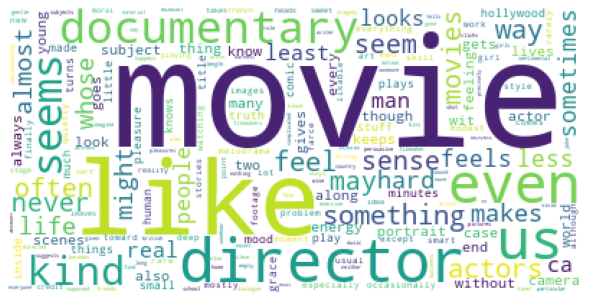

In [ ]:
# TODO: make a word cloud for top tokens

#NOTE: I looked up how to do this from examples taken from these websites
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://stackoverflow.com/questions/43145199/create-wordcloud-from-dictionary-values

word_cloud_top = WordCloud( background_color="white").generate_from_frequencies(dict(distinct_top_counter))
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(word_cloud_top)
plt.axis("off")
plt.tight_layout(pad = 0)


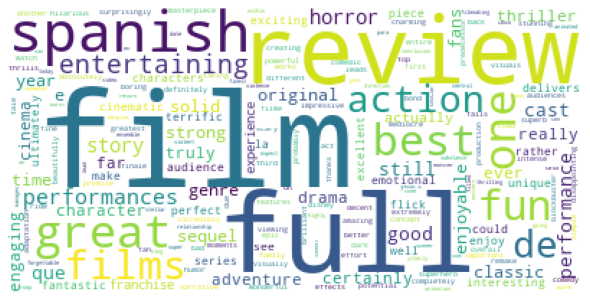

In [ ]:
# TODO: make a word cloud for regular tokens

word_cloud_top = WordCloud( background_color="white").generate_from_frequencies(dict(distinct_regular_counter))
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(word_cloud_top)
plt.axis("off")
plt.tight_layout(pad = 0)

# HW Submission

<br>
<center><img src = "https://memegenerator.net/img/instances/73124265/good-job.jpg" width= "500" align ="center"/></center>
<br>

Big congratulations for getting this far! The piece of good news is that similar to HW1, you basically know the score you have when you submit to Gradescope. However, this time, we will be manually grading your wordclouds, so the autograder score is not final! Remember also that since we'll be checking for plagiarism, make sure to cite your sources (if any) using simple urls / links.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**. 
3. Make sure you've run all the PennGrader cells (and gotten the score that you want and deserve)
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py" and upload both the Python file and ipnyb notebook to Gradescope directly, naming the files **"homework2.ipynb"** and **"homework2.py"** respectively!

###Be sure to name your files correctly!!!

**Let the course staff know ASAP if you have any issues submitting.**